<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002A;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
       TITLE
  </h2>
</div>

<h4 style="text-align: center;">Wine Quality Prediction</h4>

<div style="text-align: center;">
  <img src="https://images.unsplash.com/photo-1561461056-77634126673a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=987&q=80" alt="Breast Cancer" width="400" height="300">
</div>


# Introduction
- <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">Quality assessment</span> of wine is a *complex task* influenced by various physiochemical factors
- With the <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">increasing demand</span> for premium and refined wines, accurately determining the quality of red wine has become a *significant concern* for both producers and consumers. 
- Quality evaluation involves the <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">careful analysis</span> of multiple variables and their interactions, often requiring *advanced statistical methods* to make precise predictions.

# Aim and Objectives
**Aim:** To predict wine quality based on a set of physiochemical attributes

**Objectives:** 
1. To determine the quality of wine 
2. To determine the key features affected the quality of wine

## 💻 Machine Learning Model

<hr style="border: 3px; height: 10px; background-color: #70002a;"> <!-- Colored line -->

1. RandomForestClassifier
2. DecisionTree
3. GradientBoostingClassifier
4. GaussianNB
5. LinearSVM
6. LogisticRegression
7. KNearestNeighbors
8. rbfSVM


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002a;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;">
  <p style="padding: 10px;
            color:white;
            margin: 0;
            font-size: 130%;">
    TABLE OF CONTENTS
  </p>
</div>


<ol>
  <li><a href="#loading-data">LOADING DATA</a></li>
  <li><a href="#data-preprocessing">DATA PREPROCESSING</a></li>
  <li><a href="#exploratory-data-analysis">EXPLORATORY DATA ANALYSIS</a></li>
  <li><a href="#data-transformation">DATA TRANSFORMATION</a></li>
  <li><a href="#correlation">CORRELATION</a></li>
  <li><a href="#model-building">MODEL BUILDING</a></li>
  <li><a href="#model-evaluation">MODEL EVALUATION</a></li>
  <li><a href="#conclusion">CONCLUSION</a></li>
</ol>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002A;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 id="loading-data" style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
       1. LOADING DATA
  </h2>
</div>

In [1]:
#Library Loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso

from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# ANSI color and formatting codes
class AnsiFormatting:
    BOLD = '\033[1m'
    MAROON = '\033[91m'
    WHITE = '\033[97m'
    END = '\033[0m'

In [2]:
# Read data
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

In [3]:
# Red Wine
# Print Dataset Info
print(AnsiFormatting.BOLD + AnsiFormatting.MAROON + '.: Red Wine Dataset Info :.' + AnsiFormatting.END)
print(AnsiFormatting.BOLD + AnsiFormatting.WHITE + '*' * 30 + AnsiFormatting.END)
print(AnsiFormatting.BOLD + '>> Total Rows:' + AnsiFormatting.MAROON, df_red.shape[0])
print(AnsiFormatting.END + AnsiFormatting.BOLD + '>> Total Columns:' + AnsiFormatting.MAROON, df_red.shape[1])
print(AnsiFormatting.END + AnsiFormatting.BOLD + AnsiFormatting.WHITE + '*' * 30 + AnsiFormatting.END)

# Print Dataset Detail
print(AnsiFormatting.BOLD + AnsiFormatting.MAROON + '.: Dataset Details :.' + AnsiFormatting.END)
print(AnsiFormatting.BOLD + AnsiFormatting.WHITE + '*' * 30 + AnsiFormatting.END)
df_red.info(memory_usage=False, null_counts=False)

.: Red Wine Dataset Info :.
******************************
>> Total Rows: 1599
>> Total Columns: 12
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   fixed acidity         float64
 1   volatile acidity      float64
 2   citric acid           float64
 3   residual sugar        float64
 4   chlorides             float64
 5   free sulfur dioxide   float64
 6   total sulfur dioxide  float64
 7   density               float64
 8   pH                    float64
 9   sulphates             float64
 10  alcohol               float64
 11  quality               int64  
dtypes: float64(11), int64(1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: null_counts is deprecated. Use show_counts instead
  if sys.path[0] == "":


In [4]:
# White Wine
# Print Dataset Info
print(AnsiFormatting.BOLD + AnsiFormatting.MAROON + '.: White Wine Dataset Info :.' + AnsiFormatting.END)
print(AnsiFormatting.BOLD + AnsiFormatting.WHITE + '*' * 30 + AnsiFormatting.END)
print(AnsiFormatting.BOLD + '>> Total Rows:' + AnsiFormatting.MAROON, df_white.shape[0])
print(AnsiFormatting.END + AnsiFormatting.BOLD + '>> Total Columns:' + AnsiFormatting.MAROON, df_white.shape[1])
print(AnsiFormatting.END + AnsiFormatting.BOLD + AnsiFormatting.WHITE + '*' * 30 + AnsiFormatting.END)

# Print Dataset Detail
print(AnsiFormatting.BOLD + AnsiFormatting.MAROON + '.: Dataset Details :.' + AnsiFormatting.END)
print(AnsiFormatting.BOLD + AnsiFormatting.WHITE + '*' * 30 + AnsiFormatting.END)
df_white.info(memory_usage=False, null_counts=False)

.: White Wine Dataset Info :.
******************************
>> Total Rows: 4898
>> Total Columns: 12
******************************
.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   fixed acidity         float64
 1   volatile acidity      float64
 2   citric acid           float64
 3   residual sugar        float64
 4   chlorides             float64
 5   free sulfur dioxide   float64
 6   total sulfur dioxide  float64
 7   density               float64
 8   pH                    float64
 9   sulphates             float64
 10  alcohol               float64
 11  quality               int64  
dtypes: float64(11), int64(1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: null_counts is deprecated. Use show_counts instead
  if sys.path[0] == "":


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002A;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 id="data-preprocessing" style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
      2.  DATA PREPROCESSING
  </h2>
</div>


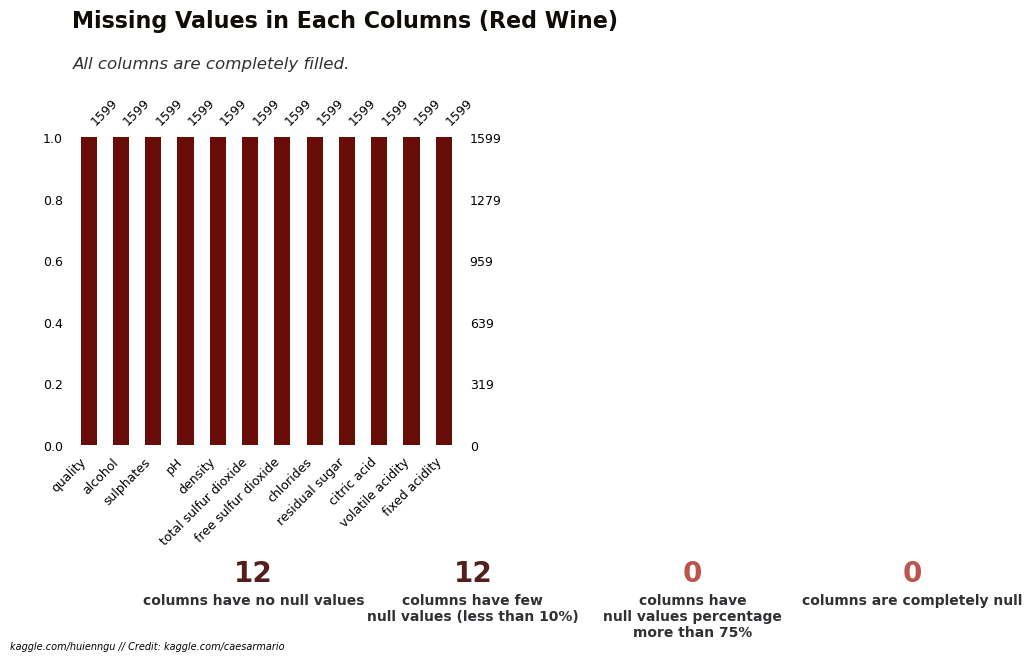

In [5]:
#Check missing value (red wine)

# Calculate missing values
df_null = df_red.isnull().sum()
df_null = pd.DataFrame({'Column Name': df_null.index, 'Total': df_null.values})

# Other settings
color_mso = ['#680C07']
not_null = df_red.shape[1] - df_null['Total'].sum()
few_null = sum(df_null['Total'] < 10)
nearly_null = sum(df_null['Total'] > df_red.shape[0] * 0.75)
complete_null = sum(df_null['Total'] == df_red.shape[0])

# Plot Missing Values
mso.bar(df_red, fontsize=9, color=color_mso, figsize=(5, 4), sort='descending', labels=True)

# Plot Settings
plt.suptitle('Missing Values in Each Columns (Red Wine)', fontweight='heavy', x=0.125, y=1.2, ha='left', fontsize=16, fontfamily='sans-serif', color='#100C07')
plt.title('All columns are completely filled.', style='italic', fontsize=12, color='#303035', loc='left', pad=20)
plt.text(5.1, -0.46, not_null, color='#541E1B', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(5.1, -0.48, 'columns have no null values', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.text(11.9, -0.46, few_null, color='#541E1B', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(11.9, -0.48, 'columns have few\nnull values (less than 10%)', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.text(18.7, -0.46, nearly_null, color='#BC544B', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(18.7, -0.48, 'columns have\nnull values percentage\nmore than 75%', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.text(25.5, -0.46, complete_null, color='#BC544B', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(25.5, -0.48, 'columns are completely null', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.gcf().text(0, -0.4, 'kaggle.com/huienngu // Credit: kaggle.com/caesarmario', style='italic', fontsize=7)
plt.grid(axis='both', alpha=0)
plt.show()

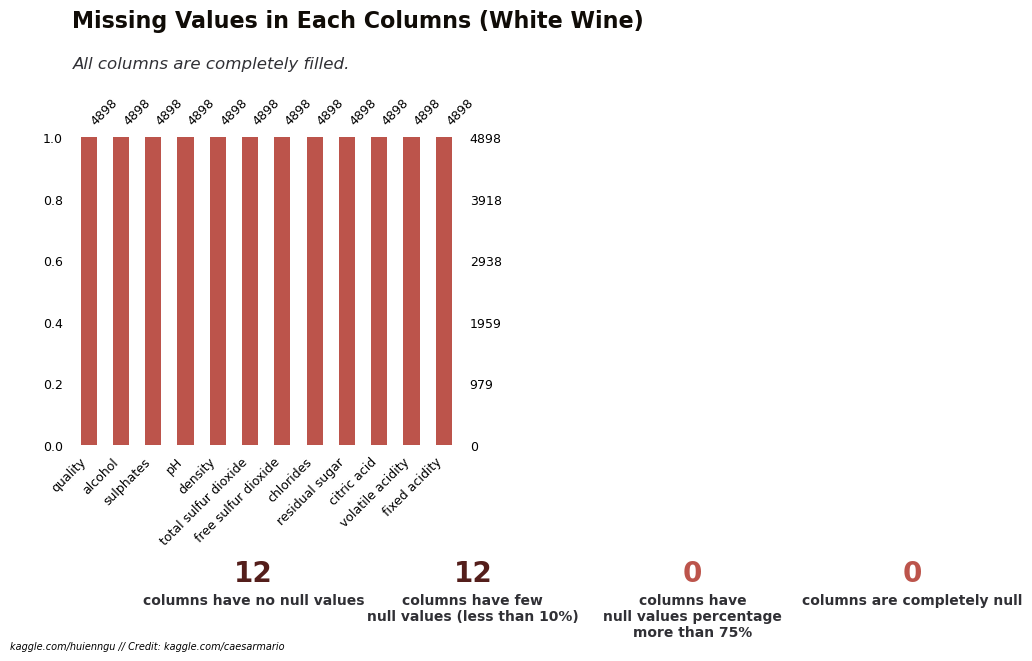

In [6]:
#Check missing value (white wine)

# Calculate missing values
df_null = df_white.isnull().sum()
df_null = pd.DataFrame({'Column Name': df_null.index, 'Total': df_null.values})

# Other settings
color_mso = ['#BC544B']
not_null = df_white.shape[1] - df_null['Total'].sum()
few_null = sum(df_null['Total'] < 10)
nearly_null = sum(df_null['Total'] > df_white.shape[0] * 0.75)
complete_null = sum(df_null['Total'] == df_white.shape[0])

# Plot Missing Values
mso.bar(df_white, fontsize=9, color=color_mso, figsize=(5, 4), sort='descending', labels=True)

# Plot Settings
plt.suptitle('Missing Values in Each Columns (White Wine)', fontweight='heavy', x=0.125, y=1.2, ha='left', fontsize=16, fontfamily='sans-serif', color='#100C07')
plt.title('All columns are completely filled.', style='italic', fontsize=12, color='#303035', loc='left', pad=20)
plt.text(5.1, -0.46, not_null, color='#541E1B', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(5.1, -0.48, 'columns have no null values', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.text(11.9, -0.46, few_null, color='#541E1B', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(11.9, -0.48, 'columns have few\nnull values (less than 10%)', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.text(18.7, -0.46, nearly_null, color='#BC544B', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(18.7, -0.48, 'columns have\nnull values percentage\nmore than 75%', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.text(25.5, -0.46, complete_null, color='#BC544B', fontsize=20, ha='center', weight='bold', va='bottom')
plt.text(25.5, -0.48, 'columns are completely null', color='#303035', fontsize=10, ha='center', va='top', weight='bold')
plt.gcf().text(0, -0.4, 'kaggle.com/huienngu // Credit: kaggle.com/caesarmario', style='italic', fontsize=7)
plt.grid(axis='both', alpha=0)
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 id="exploratory-data-analysis" style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
      3. EXPLORATORY DATA ANALYSIS
  </h2>
</div>

## Red Wine Analysis

In [7]:
# --- Dataset Report ---
ProfileReport(df_red, title='Red Wine Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '650px'}}, html={'style':{'primary_color': '#722F37'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

**To save the report , call the "to.file()" function on the profile object (HTML or JSON format)**
1. profile.to_file("Analysis.html")
2. profile.to_file("Analysis.json")

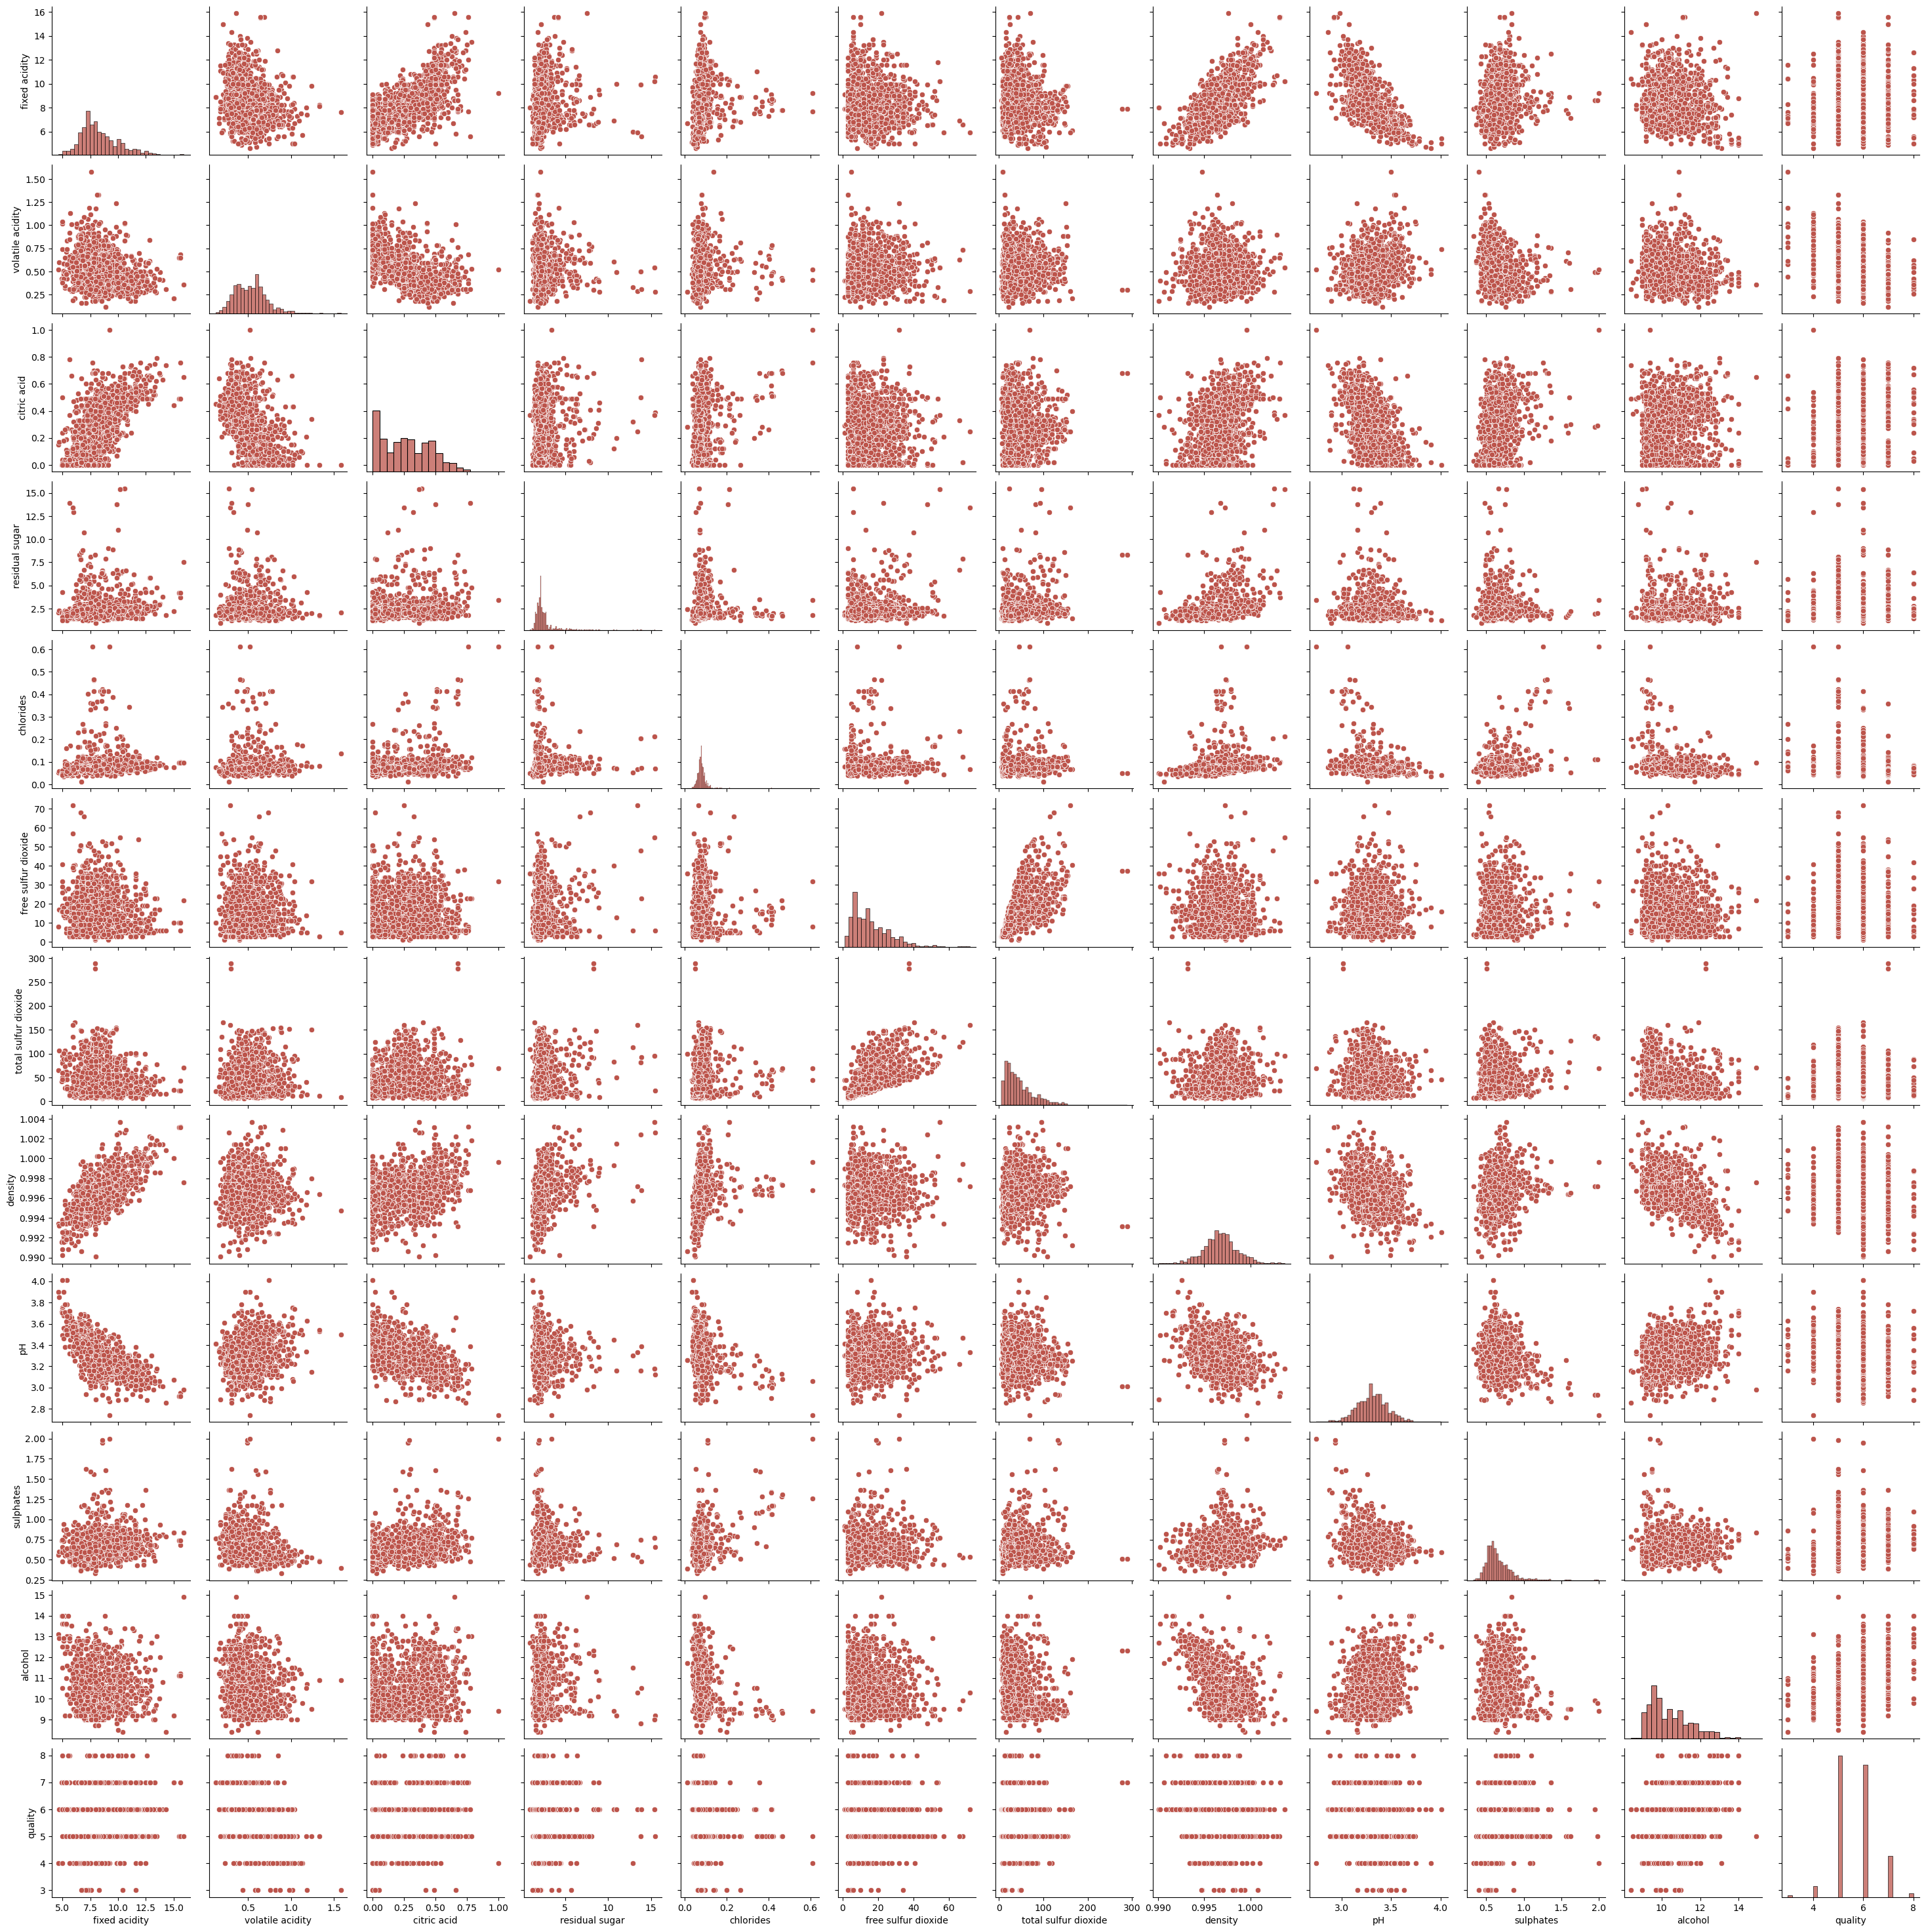

In [8]:
import seaborn as sns

# Define a custom color palette
custom_palette = ['#BC544B']

# Set the custom color palette
sns.set_palette(custom_palette)

# Create the pair plot
sns.pairplot(df_red)

# Display the plot
plt.show()

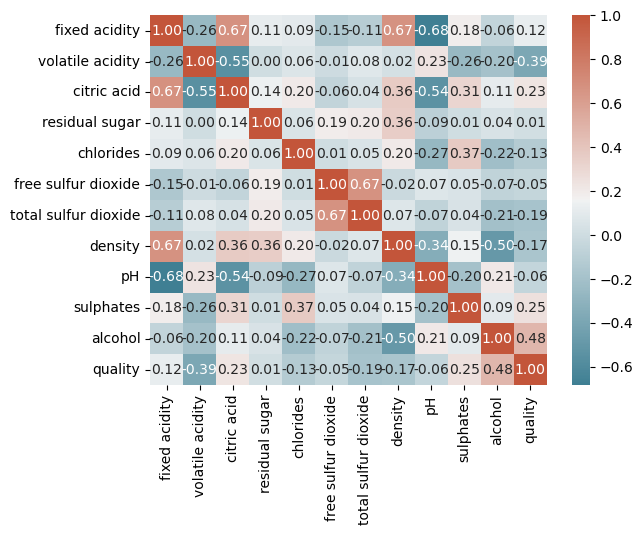

In [9]:
# Set the custom color map
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap
sns.heatmap(df_red.corr(), annot=True, fmt='.2f', cmap=custom_cmap)

# Display the plot
plt.show()

## White Wine Analysis

In [10]:
# --- Dataset Report ---
ProfileReport(df_white, title='Red Wine Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '650px'}}, html={'style':{'primary_color': '#722F37'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

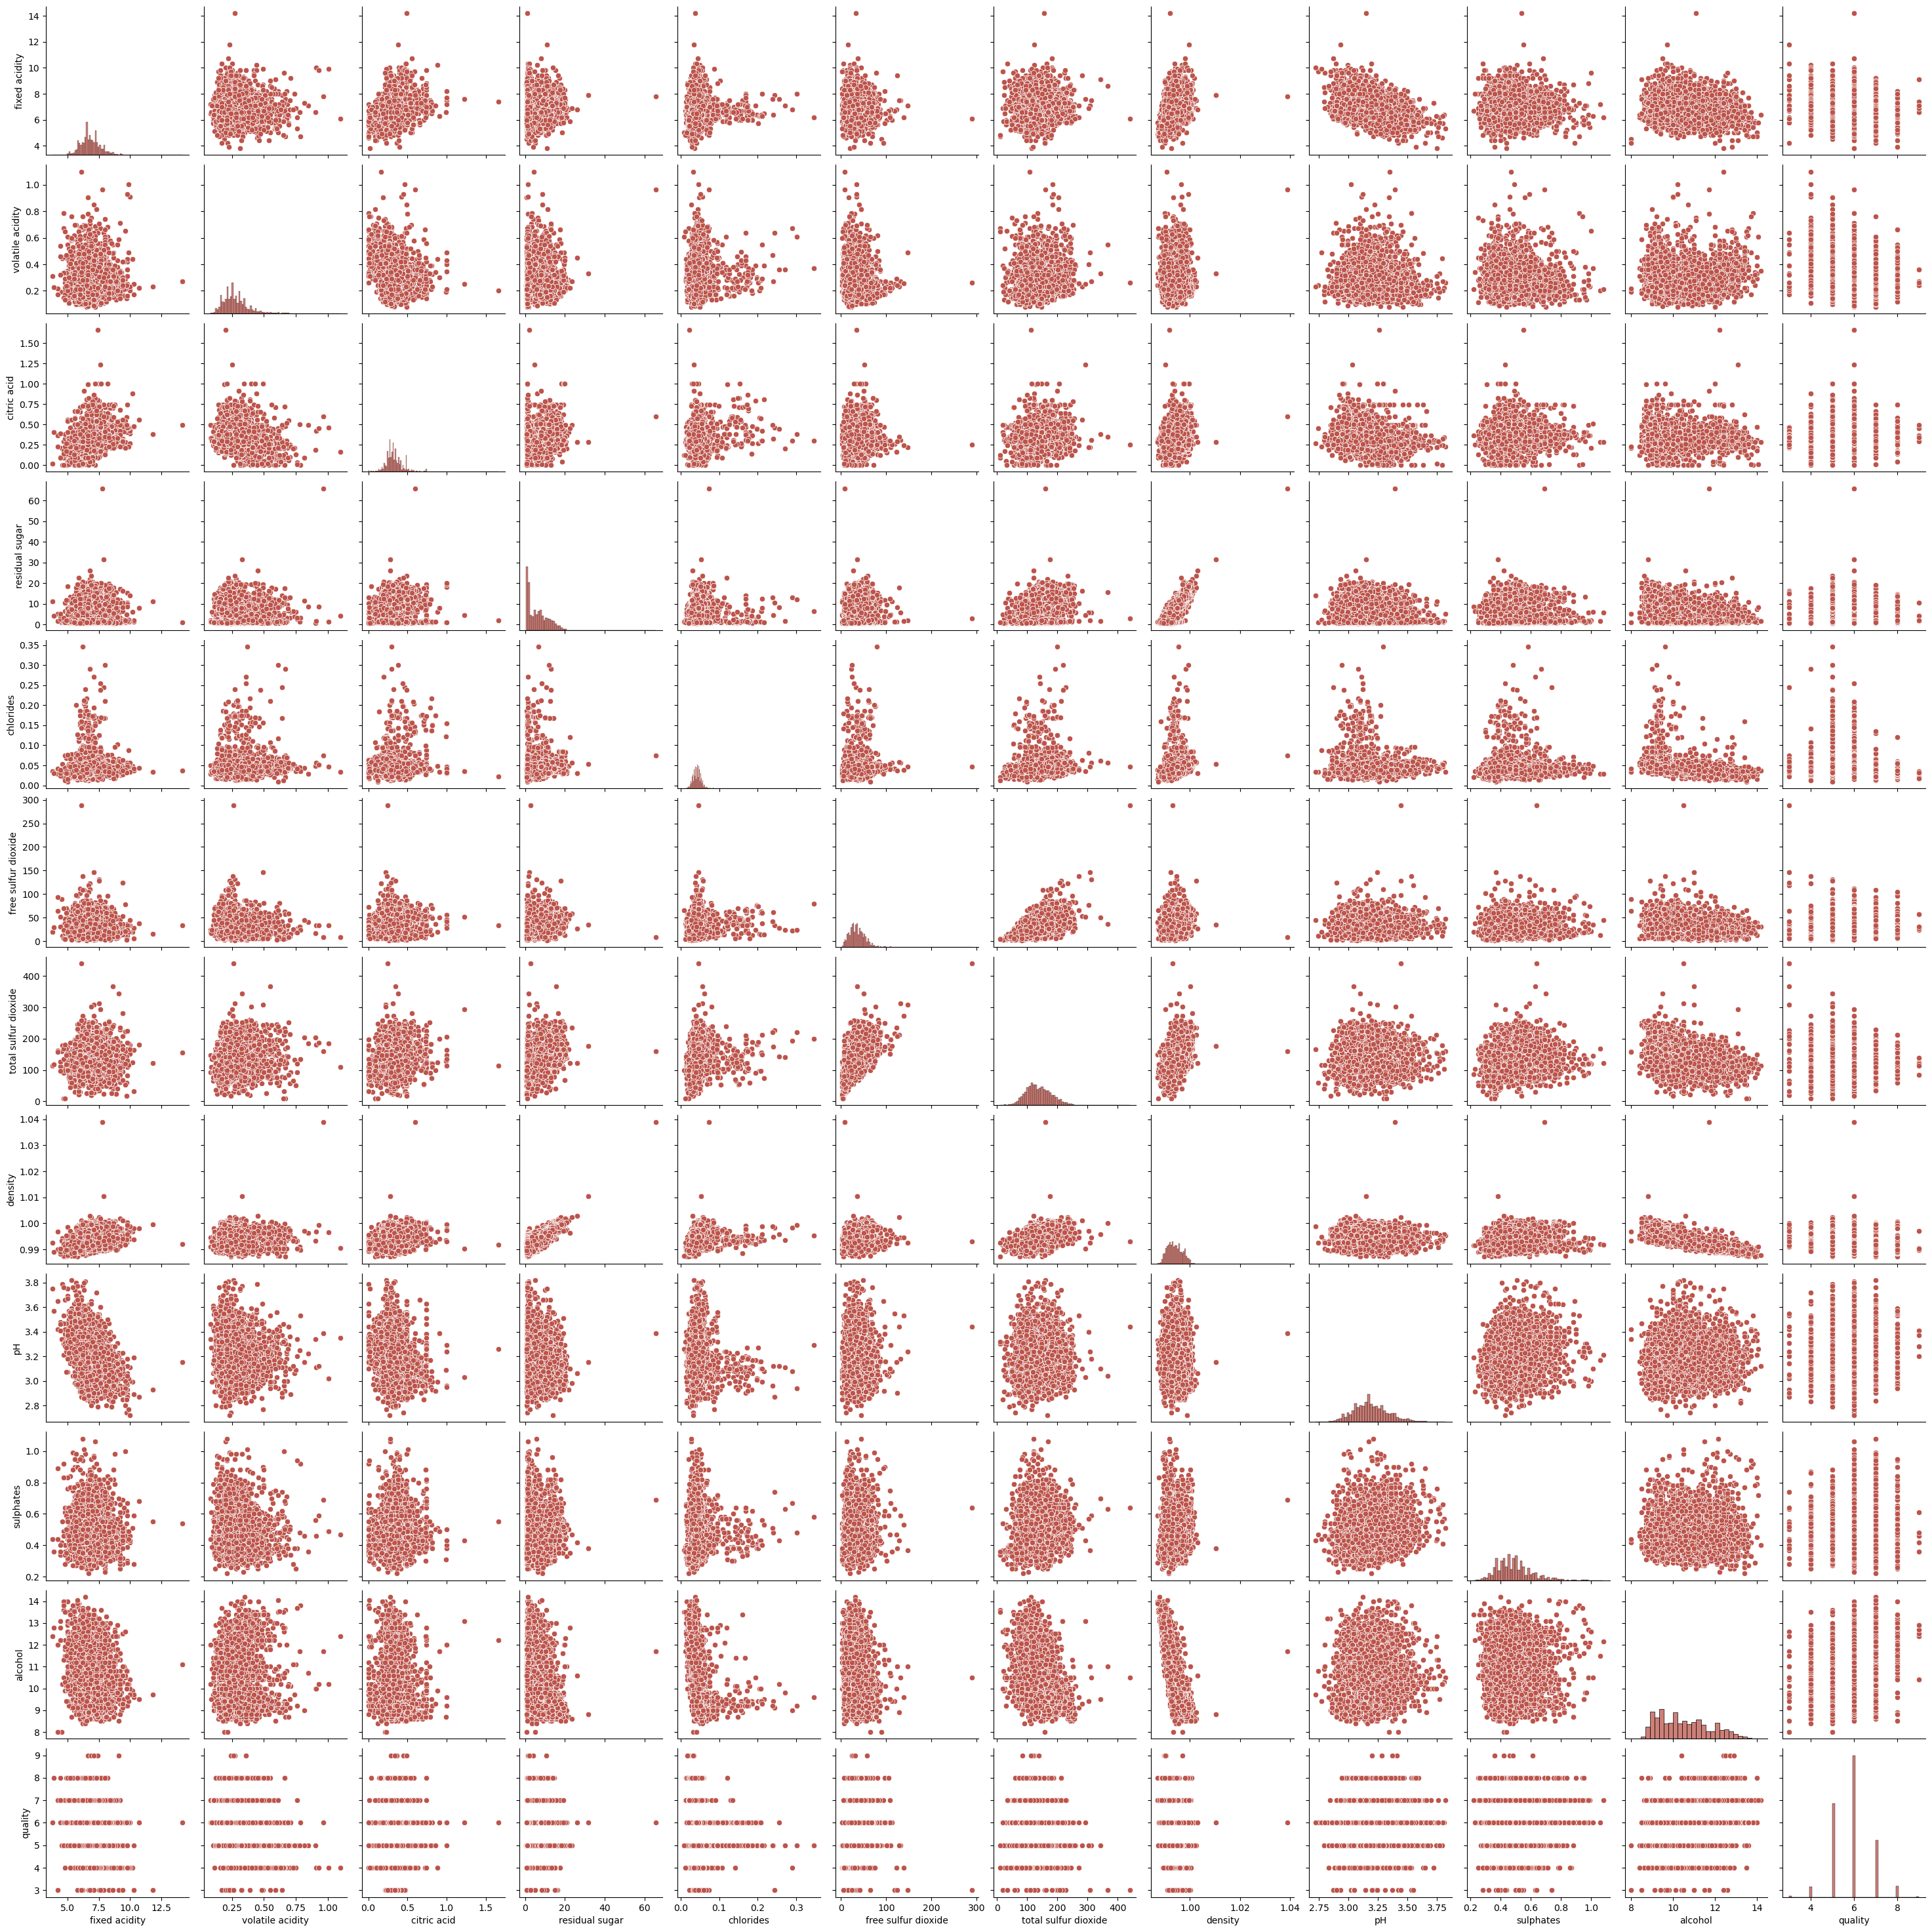

In [11]:
import seaborn as sns

# Set the custom color palette
sns.set_palette(custom_palette)

# Create the pair plot
sns.pairplot(df_white)

# Display the plot
plt.show()

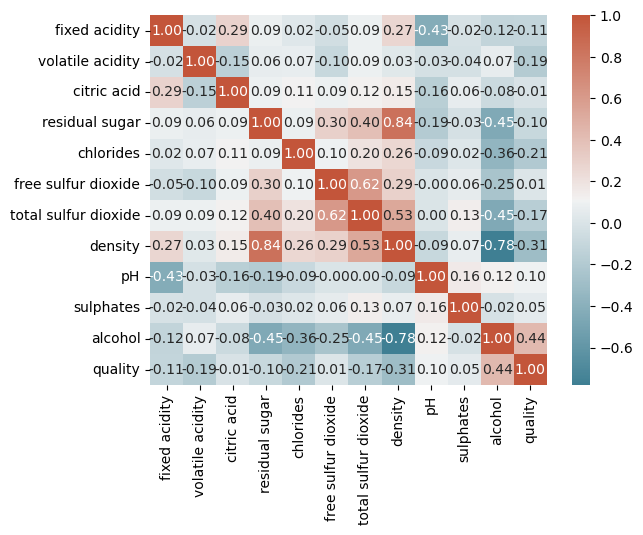

In [12]:
# Create the heatmap
sns.heatmap(df_white.corr(), annot=True, fmt='.2f', cmap=custom_cmap)

# Display the plot
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 id="data-transformation" style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
      4. DATA TRANSFORMATION
  </h2>
</div>

## Merge both data sets

In [13]:
# Add new attribute called wine_category to the both dataframe
df_white['wine_category'] = 'white'
df_red['wine_category'] = 'red'

In [14]:
# Convert into categorical dataset
df_red['quality_label'] = df_red['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_red['quality_label'] = pd.Categorical(df_red['quality_label'], categories=['low', 'medium', 'high'])

df_white['quality_label'] = df_white['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_white['quality_label'] = pd.Categorical(df_white['quality_label'], categories=['low', 'medium', 'high'])

In [15]:
print(df_white['quality_label'].value_counts())
df_red['quality_label'].value_counts()

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64


medium    837
low       744
high       18
Name: quality_label, dtype: int64

In [16]:
df_wines = pd.concat([df_red, df_white])

# Re-shuffle records just to randomize data points.
# `drop=True`: this resets the index to the default integer index.
df_wines = df_wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
df_wines.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   
5            7.2              0.53         0.14             2.1      0.064   
6            7.5              0.27         0.31            17.7      0.051   
7            6.8              0.11         0.27             8.6      0.044   
8            9.0              0.44         0.49             2.4      0.078   
9            7.1              0.23         0.30             2.6      0.034   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   
5                 15.0                  29.0  0.99323  3.35       0.61   
6                 33.0                 173.0  0.99900  3.09       0.64   
7                 45.0                 104.0  0.99454  3.20       0.37   
8                 26.0                 121.0  0.99780  3.23       0.58   
9                 62.0                 148.0  0.99121  3.03       0.56   

   alcohol  quality wine_category quality_label  
0     12.2        8         white          high  
1      9.9        5           red           low  
2     12.0        7         white        medium  
3      9.5        6         white        medium  
4      8.9        6         white        medium  
5     12.1        6           red        medium  
6     10.2        5         white           low  
7      9.9        6         white        medium  
8      9.2        5           red           low  
9     11.3        7         white        medium

## Categorize wine quality into low, medium and high

In [17]:
subset_attr = ['alcohol', 'density', 'pH', 'quality']

low = round(df_wines[df_wines['quality_label'] == 'low'][subset_attr].describe(), 2)
medium = round(df_wines[df_wines['quality_label'] == 'medium'][subset_attr].describe(), 2)
high = round(df_wines[df_wines['quality_label'] == 'high'][subset_attr].describe(), 2)

pd.concat([low, medium, high], axis=1,
keys=['👎 Low Quality Wine',
'👌 Medium Quality Wine',
'👍 High Quality Wine'])

👎 Low Quality Wine                            👌 Medium Quality Wine  \
                 alcohol  density       pH  quality               alcohol   
count            2384.00  2384.00  2384.00  2384.00               3915.00   
mean                9.87     1.00     3.21     4.88                 10.81   
std                 0.84     0.00     0.16     0.36                  1.20   
min                 8.00     0.99     2.74     3.00                  8.40   
25%                 9.30     0.99     3.11     5.00                  9.80   
50%                 9.60     1.00     3.20     5.00                 10.80   
75%                10.40     1.00     3.31     5.00                 11.70   
max                14.90     1.00     3.90     5.00                 14.20   

                                 👍 High Quality Wine                          
       density       pH  quality             alcohol density      pH quality  
count  3915.00  3915.00  3915.00              198.00  198.00  198.00  198.00  
mean      0.99     3.22     6.28               11.69    0.99    3.23    8.03  
std       0.00     0.16     0.45                1.27    0.00    0.16    0.16  
min       0.99     2.72     6.00                8.50    0.99    2.88    8.00  
25%       0.99     3.11     6.00               11.00    0.99    3.13    8.00  
50%       0.99     3.21     6.00               12.00    0.99    3.23    8.00  
75%       1.00     3.33     7.00               12.60    0.99    3.33    8.00  
max       1.04     4.01     7.00               14.00    1.00    3.72    9.00

# Wine Quality Analysis

In [18]:
# --- Dataset Report ---
ProfileReport(df_wines, title='Red Wine Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '650px'}}, html={'style':{'primary_color': '#722F37'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [19]:
# Data encoding
label_quality = LabelEncoder()

df_wines['quality_label'] = label_quality.fit_transform(df_wines['quality_label'])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 id="correlation" style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
      5. CORRELATION
  </h2>
</div>

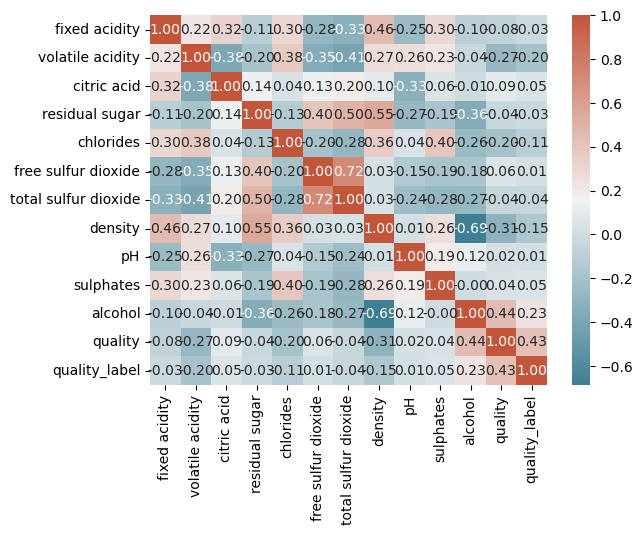

In [20]:
# Create the heatmap
sns.heatmap(df_wines.corr(), annot=True, fmt='.2f', cmap=custom_cmap)

# Display the plot
plt.show()

In [21]:
correlation_matrix = df_wines.corr()
correlation_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
quality_label             -0.027645         -0.200306     0.054444   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   
quality_label              -0.026178  -0.110552             0.014349   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   
quality_label                    -0.044861 -0.153128  0.011725   0.045994   

                       alcohol   quality  quality_label  
fixed acidity        -0.095452 -0.076743      -0.027645  
volatile acidity     -0.037640 -0.265699      -0.200306  
citric acid          -0.010493  0.085532       0.054444  
residual sugar       -0.359415 -0.036980      -0.026178  
chlorides            -0.256916 -0.200666      -0.110552  
free sulfur dioxide  -0.179838  0.055463       0.014349  
total sulfur dioxide -0.265740 -0.041385      -0.044861  
density              -0.686745 -0.305858      -0.153128  
pH                    0.121248  0.019506       0.011725  
sulphates            -0.003029  0.038485       0.045994  
alcohol               1.000000  0.444319       0.233138  
quality               0.444319  1.000000       0.431342  
quality_label         0.233138  0.431342       1.000000

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 id="model-building" style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
      6. MODEL BUILDING
  </h2>
</div>

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df_wines.drop(['quality','wine_category'],axis=1),df_wines['quality_label'],test_size=0.30,random_state=42)

models=[LogisticRegression(),
LinearSVC(),
SVC(kernel='rbf'),
KNeighborsClassifier(),
RandomForestClassifier(),
DecisionTreeClassifier(),
GradientBoostingClassifier(),
GaussianNB()]

In [23]:
model_names = ['LogisticRegression', 'LinearSVM', 'rbfSVM', 'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree', 'GradientBoostingClassifier', 'GaussianNB']

acc = []
eval_acc = {}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train, y_train)
    pred = classification_model.predict(x_test)
    acc.append(accuracy_score(pred, y_test))

eval_acc = {'Modelling Algorithm': model_names, 'Accuracy': acc}
eval_acc


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.9682051282051282,
  0.9758974358974359,
  0.6051282051282051,
  0.6912820512820513,
  1.0,
  1.0,
  1.0,
  1.0]}

In [24]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

Modelling Algorithm  Accuracy
4      RandomForestClassifier  1.000000
5                DecisionTree  1.000000
6  GradientBoostingClassifier  1.000000
7                  GaussianNB  1.000000
1                   LinearSVM  0.975897
0          LogisticRegression  0.968205
3           KNearestNeighbors  0.691282
2                      rbfSVM  0.605128

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 id="model-evaluation" style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
      7. MODEL EVALUATION
  </h2>
</div>

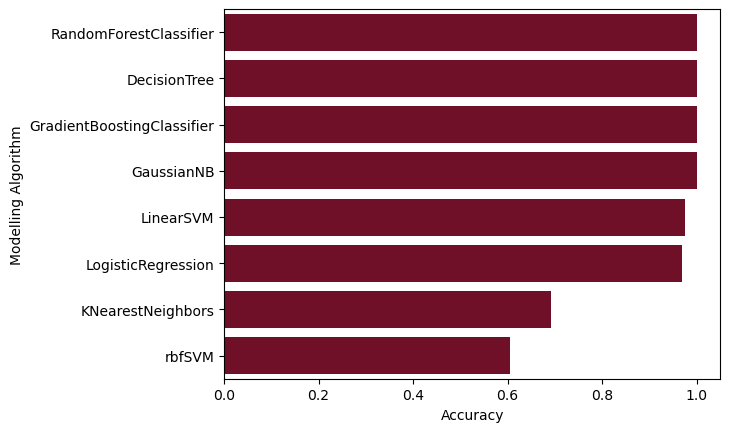

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot with custom color
sns.barplot(y='Modelling Algorithm', x='Accuracy', data=acc_table, color="#800020")

# Display the plot
plt.show()

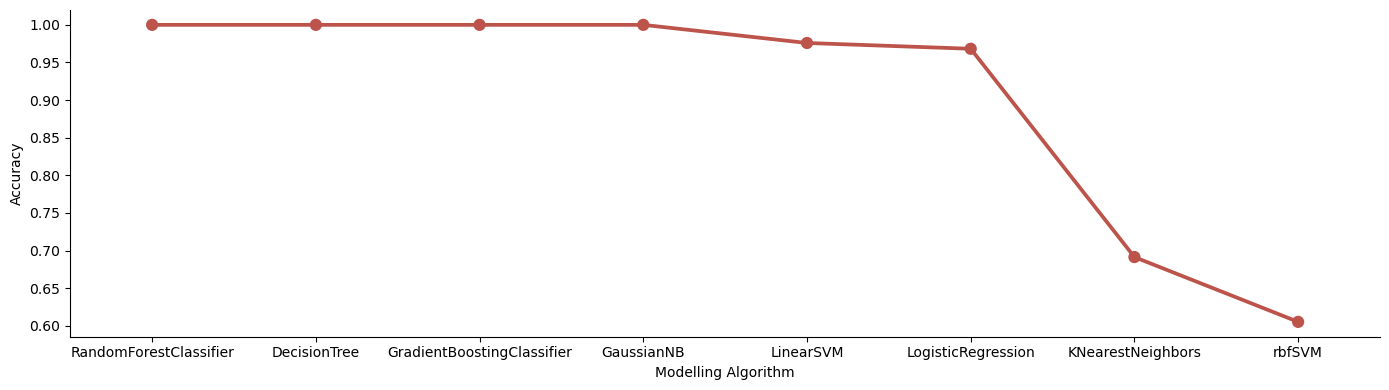

In [26]:
sns.catplot(x='Modelling Algorithm', y='Accuracy', data=acc_table, kind='point', height=4, aspect=3.5)

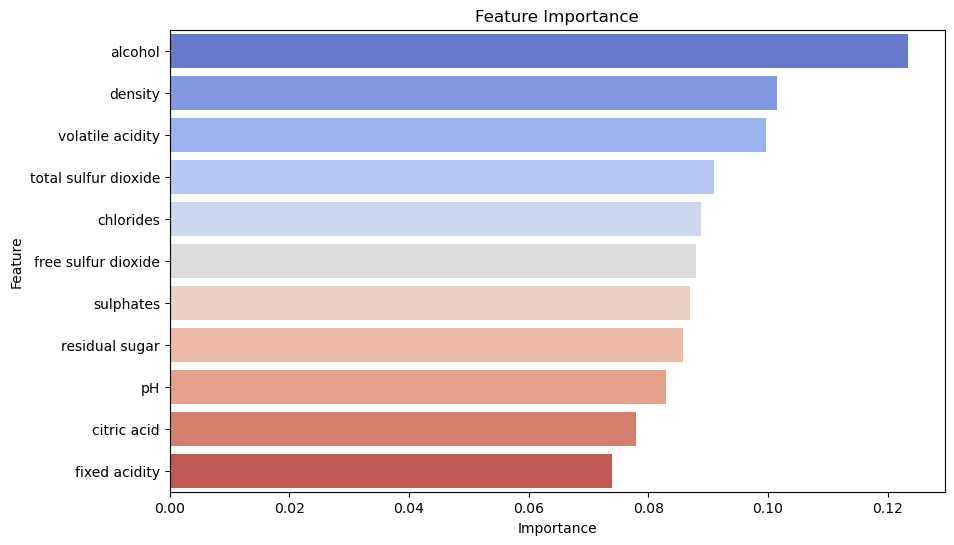

In [27]:
# Assuming df_wines is your DataFrame
# Drop non-numeric columns
numeric_columns = df_wines.select_dtypes(include=['number'])
X = numeric_columns.drop(['quality', 'quality_label'], axis=1)  # Features
y = df_wines['quality']  # Target

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize the importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#70002a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align:center;
           margin-top: 10px;
           margin-bottom: 10px;">
  <h2 id="conclusion" style="text-align:center; padding: 10px;
            color:white;
            margin: 0;">
      8. CONCLUSION
  </h2>
</div>

## Optimal Algorithm

Highest accurations was achieved by <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">Random Forest</span>, <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">Decision Tree</span>, <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">Gradient Boosting</span>, <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">Gaussian Naive Bayes</span> with <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">100%</span>, followed by **Linear SVM (97.23%), Logistic Regression (96.31%), KNN (69.13%) and rbfSVM (60.51%)**.

## Key Feature

1. The <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">alcohol</span> feature stands out as the most influential factor in determining wine quality. 

2. The <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">density</span> of the wine comes next in terms of importance. It's important to note that density could be indicative of various factors, including sugar content and overall richness.

3. <span style="background-color: #FDE5E5; padding: 2px 4px; font-weight: bold;">Volatile Acidity</span> is another noteworthy feature. Wines with lower volatile acidity tend to have higher quality ratings. This corresponds to the common understanding that excessive volatile acidity can introduce undesirable flavors.

## Strategy

1. **Production Improvement:**
    - *Fine-tuning Ingredients:* Adjusting the levels of key ingredients such as alcohol content, acidity, and pH can target specific quality improvements.
    - *Optimizing Fermentation:* Monitoring and optimizing the fermentation process to achieve desired taste and aroma profiles.
    - *Minimizing Defects:* Addressing factors that contribute to undesirable attributes, such as volatile acidity, can lead to better-quality wines.

2. **Wine Selection and Marketing:**
    - *Segmentation:* Use predicted quality ratings to segment wines into quality tiers, enabling targeted marketing to different consumer preferences.
    - *Highlight Key Attributes:* Leverage the most influential attributes identified by the model in marketing materials to attract consumers looking for specific qualities.

3. **Customer Engagement:**
    - *Custom Recommendations:* Provide personalized wine recommendations to customers based on their preferences and past purchases.
    - *Educational Content:* Educate consumers about the importance of various attributes in wine quality, fostering a deeper appreciation and understanding.

4. **Process Optimization:**
    - *Real-time Monitoring:* Implement real-time monitoring of key attributes during production to detect deviations and make timely adjustments.
    - *Predictive Analytics:* Utilize the model to predict potential quality issues before they occur, allowing for proactive interventions.

5. **Quality Assurance:**
    - *Consistency Checks:* Use the model to monitor the consistency of wine quality over time and across batches.
    - *Quality Control:* Implement quality control procedures based on predicted quality ratings to ensure that only wines meeting certain standards are released.

6. **Sustainability:**
    - *Resource Optimization:* Identify opportunities to optimize resource usage based on quality predictions, leading to reduced waste and environmental impact.
    - *Eco-Friendly Practices:* Develop wines that align with consumer preferences for sustainable and eco-friendly products.
